Importing

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading paths to reference GS plot and to the folder with GS plots from the reshuffled data|

In [37]:
path_to_file = "C:/Users/gregoruar/Desktop/alexey_work/ref_scan_250_40.DAT"
path_to_folder = "C:/Users/gregoruar/Desktop/alexey_work/scans/"

Defining functions

In [2]:
def checking_completeness(table):
    n = len(table)
    return(n)

In [3]:
def length_of_signal(table, genotype, threshold):
    list_max = []
    list_total = []
    for i,j in zip(["Siberian", "Far-Eastern","European","Omsk"],["Siberian", "Far-eastern","European","Omsk"]):
        if genotype == i:
            gen_ = j
    for row in table[gen_]:
        if row >= threshold:
            try:
                list_max.append(list_max[-1]+1)
            except IndexError:
                list_max.append(1)
            list_total.append(1)
        else:
            list_max.append(0)
            list_total.append(0)
    return(max(list_max),sum(list_total))

In [15]:
def integrating(table, genotype, threshold):
    list_integr = []
    for i,j in zip(["Siberian", "Far-Eastern","European","OHFV"],["Siberian", "Far-eastern","European","Omsk"]):
        if genotype == i:
            gen_ = j
    S = 0
    for row in table[gen_]:
        list_integr.append(row)
        if row > threshold:
            try:
                prev_row = list_integr[-1]
                if prev_row > threshold:
                    S += (prev_row - threshold) + (row - prev_row)/2
                else:
                    S += (row - threshold)/(row - prev_row)*(row - threshold)/2
            except IndexError:
                continue
        else:
            try:
                prev_row = list_integr[-1]
                if prev_row > threshold:
                    S += (prev_row - threshold)/(prev_row - row)*(prev_row - threshold)/2
            except IndexError:
                continue
    return(S)

In [5]:
def wrapper(path_to_file, path_to_folder, genotype, threshold):
    with open(path_to_file) as file:
        table_init = pd.read_csv(file, sep='\t')
    result_max, result_total = length_of_signal(table_init, genotype, threshold)
    for root, directory, filename in os.walk(path_to_folder):
        for name in filename:
            if "Raw_Data" in name:
                ind = filename.index(name)
                del(filename[ind])
    list_with_files = filename[:]
    list_with_results = []
    for scan in list_with_files:
        with open(os.path.join(path_to_folder+scan)) as file:
            table_recursive = pd.read_csv(file, sep='\t')
        list_with_results.append(length_of_signal(table_recursive, genotype, threshold))
    p_max_ = 0
    p_total_ = 0
    for i in range(len(list_with_results)):
        if list_with_results[i][0]  >= result_max:
            p_max_ += 1
        if list_with_results[i][1]  >= result_total:
            p_total_ += 1
    p_val_max = p_max_/len(list_with_results)
    p_val_total = p_total_/len(list_with_results)
    return(p_val_max, p_val_total, list_with_results)
        

In [6]:
def wrapper_int(path_to_file, path_to_folder, genotype, threshold):
    with open(path_to_file) as file:
        table_init = pd.read_csv(file, sep='\t')
    Square_ref = integrating(table_init, genotype, threshold)
    for root, directory, filename in os.walk(path_to_folder):
        for name in filename:
            if "Raw_Data" in name:
                ind = filename.index(name)
                del(filename[ind])
    list_with_files = filename[:]
    list_with_results = []
    for scan in list_with_files:
        with open(os.path.join(path_to_folder+scan)) as file:
            table_recursive = pd.read_csv(file, sep='\t')
        list_with_results.append(integrating(table_recursive, genotype, threshold))
    p_int_ = 0
    for i in range(len(list_with_results)):
        if list_with_results[i]  >= Square_ref:
            p_int_ += 1
    p_val_int = p_int_/len(list_with_results)
    return(p_val_int, list(list_with_results))
        

In [36]:
def plotter(path_to_file, path_to_folder, path_to_save, genotype, color):
    
    threshold_list = [0.49 + i/100 for i in range(52)]
    p_val_int_list = []
    list_with_lists = []
    for threshold in threshold_list:
        s, l = wrapper_int(path_to_file, path_to_folder, genotype, threshold)
        p_val_int_list.append(s)
        list_with_lists.append(l)
        
    font = {'family': 'arial',
           'color': 'black',
           'weight': 'normal',
           'size': 30
           }
    plt.figure(figsize=(10,10))
    plt.title(genotype + " genotype", fontdict = font)
    plt.xlabel("threshold", fontdict = font)
    plt.ylabel("p-value", fontdict = font)
    plt.ylim((-0.1,1.1))
    plt.xlim((0.5,1.0))
    plt.plot(threshold_list,p_val_int_list,color=color,linewidth=5)
    plt.tick_params(labelsize = 15)
    plt.minorticks_on()
    plt.grid(True, which = 'major', linestyle = '-', linewidth = 2)
    plt.grid(True, which = 'minor', linestyle = '--')
    plt.show()
    plt.savefig(path_to_save + "GSAUC_" + genotype + ".png", dpi = 300)

Executing script for different genotypes

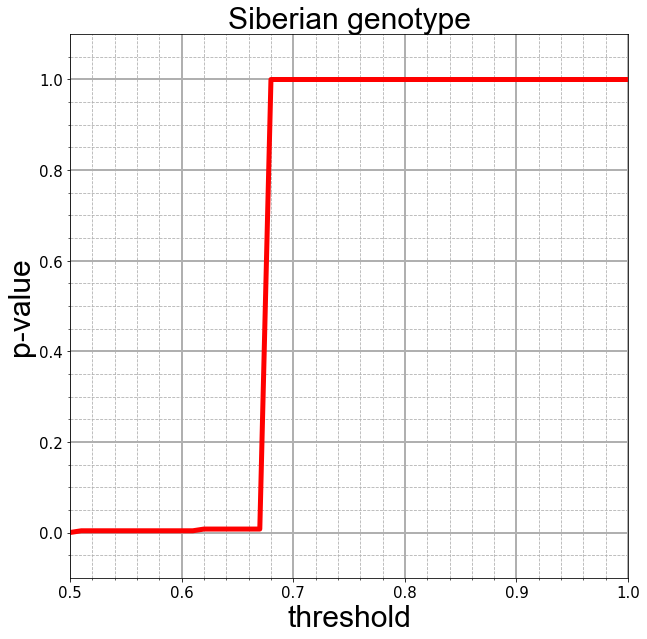

<Figure size 432x288 with 0 Axes>

In [38]:
path_to_save = "C:/Users/gregoruar/Desktop/alexey_work/"
genotype = "Siberian"
color = 'r'
plotter(path_to_file=path_to_file, 
        path_to_folder=path_to_folder,
       path_to_save=path_to_save,
       genotype=genotype,
       color=color)

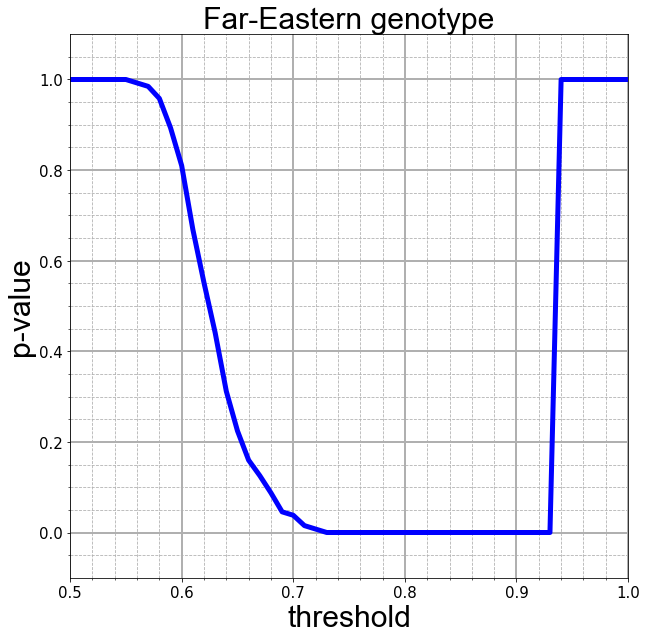

<Figure size 432x288 with 0 Axes>

In [39]:
path_to_save = "C:/Users/gregoruar/Desktop/alexey_work/"
genotype = "Far-Eastern"
color = 'b'
plotter(path_to_file=path_to_file, 
        path_to_folder=path_to_folder,
       path_to_save=path_to_save,
       genotype=genotype,
       color=color)

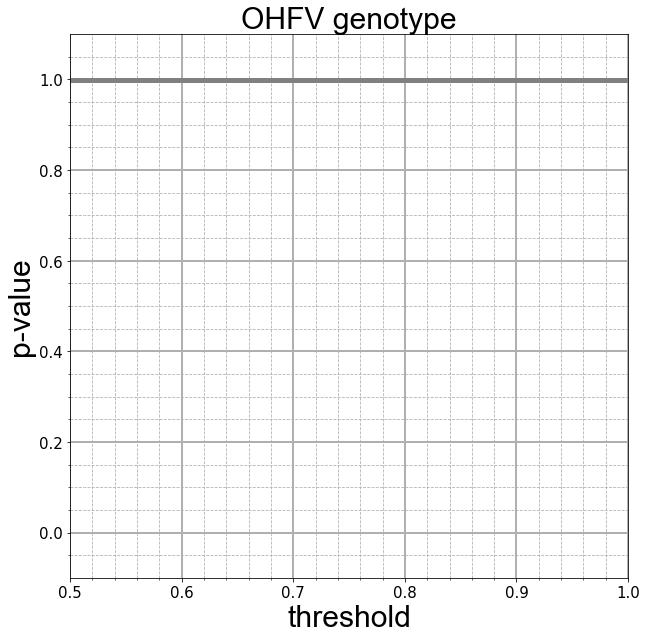

<Figure size 432x288 with 0 Axes>

In [40]:
path_to_save = "C:/Users/gregoruar/Desktop/alexey_work/"
genotype = "OHFV"
color = 'grey'
plotter(path_to_file=path_to_file, 
        path_to_folder=path_to_folder,
       path_to_save=path_to_save,
       genotype=genotype,
       color=color)

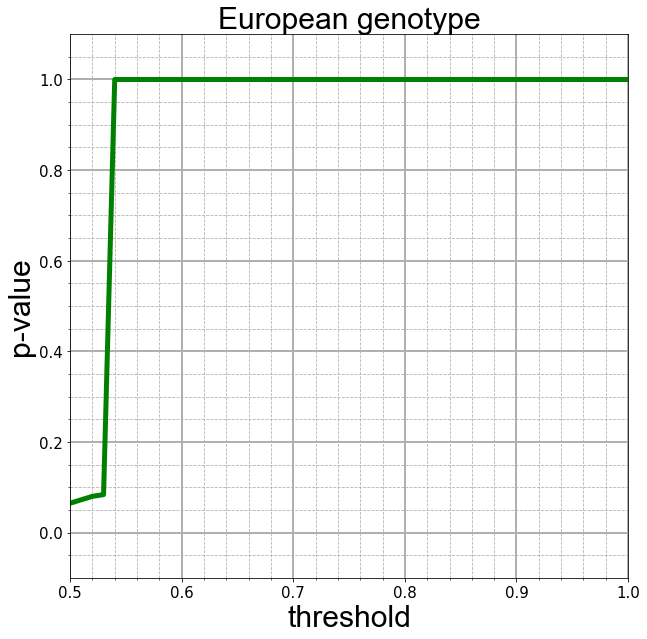

<Figure size 432x288 with 0 Axes>

In [42]:
path_to_save = "C:/Users/gregoruar/Desktop/alexey_work/"
genotype = "European"
color = 'green'
plotter(path_to_file=path_to_file, 
        path_to_folder=path_to_folder,
       path_to_save=path_to_save,
       genotype=genotype,
       color=color)